we will construct a linear model that explains the relationship a car's mileage(mpg) has with its other attributes

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and review data

In [2]:
cData = pd.read_csv('C:/Users/h.p/Desktop/Artificial Intelligance using python/ml_foundation/auto-mpg.csv')
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
cData.shape

(398, 9)

In [4]:
#Dropping/ignoring car_name
cData = cData.drop('car name', axis=1)

In [5]:
#Replacing the categorical variable with actual value
cData['origin'] = cData['origin'].replace({1:'America', 2:'Europe', 3:'Asia'})
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


# Create dummy variable
Values like America can not be read into an equation.Using substitutes like 1 for America, 2 for Europe, 3 for Asia would end up implying that europian cars fall exactly half way between american and asian cars! we don't want to impose such an bussiness assumption.

So we create three simple true or false columns with title equivalent to "Is this car America?", "Is this car Europian?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions. 

In [6]:
cData = pd.get_dummies(cData, columns = ['origin'])

In [7]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


# Dealing with missing values

In [8]:
#A quick summary of the data columns
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [9]:
#horsepower is missing seem it does not seems to be recognized to be a numerical column
cData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

In [10]:
# isdigit()? on 'horsepower'
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())   # if the string is made of digits stores true else false

#print isdigit() = False
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [11]:
# missing value have '?'
# replace missing value with NaN
cData = cData.replace('?', np.nan)
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


There are various way to handle missing values. Drop the rows, replace missing value with meadian values etc. Of the 398 rows 6 have NaN in the horsepower column. We could drop those 6 rows which might not be a good idea under all situations.

Instead of dropping 6 rows lets replace the missing values with median values.

In [12]:
cData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_America       1.0
origin_Asia          0.0
origin_Europe        0.0
dtype: float64

In [13]:
medianFilter = lambda x:x.fillna(x.median())
cData = cData.apply(medianFilter, axis = 0)

 # converting the horsepower column from object/string to float
cData['horsepower'] = cData['horsepower'].astype('float64') 

In [14]:
# again the summary of data columns
cData.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [15]:
cData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower        float64
weight              int64
acceleration      float64
model year          int64
origin_America      uint8
origin_Asia         uint8
origin_Europe       uint8
dtype: object

# Bi-Variate plots
A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn library creates a dashboard reflecting useful information about the dimentions. The result can be stored as a .png file.

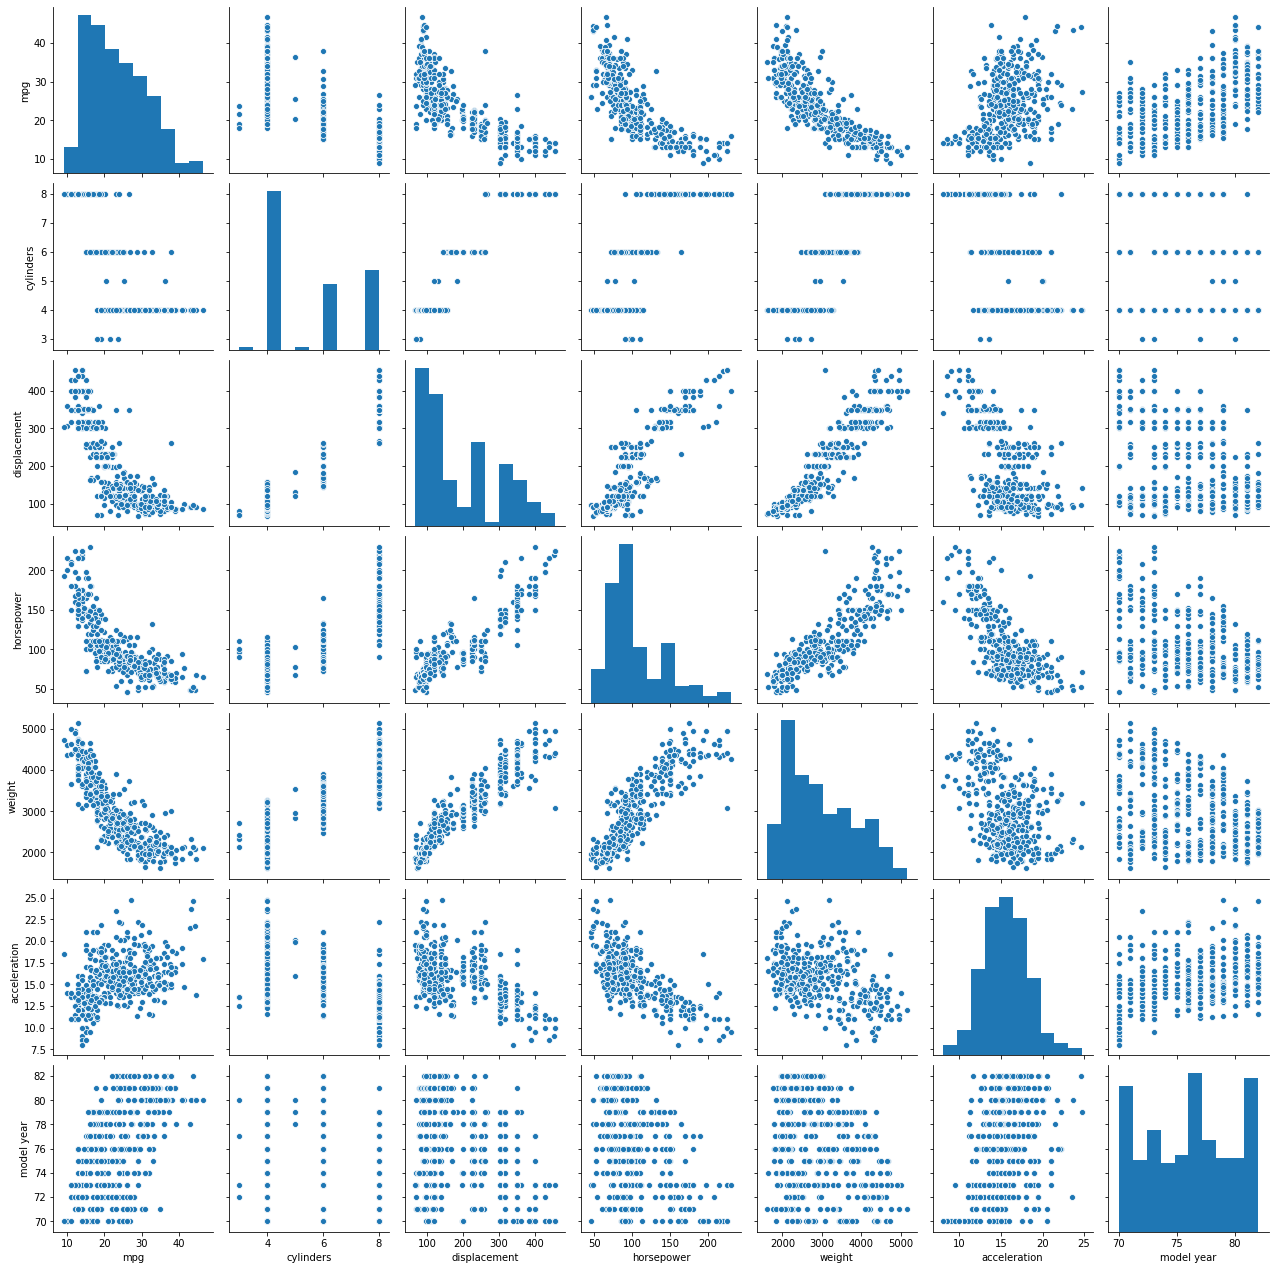

In [16]:
cData_attr = cData.iloc[:,0:7]
sns.pairplot(cData_attr)

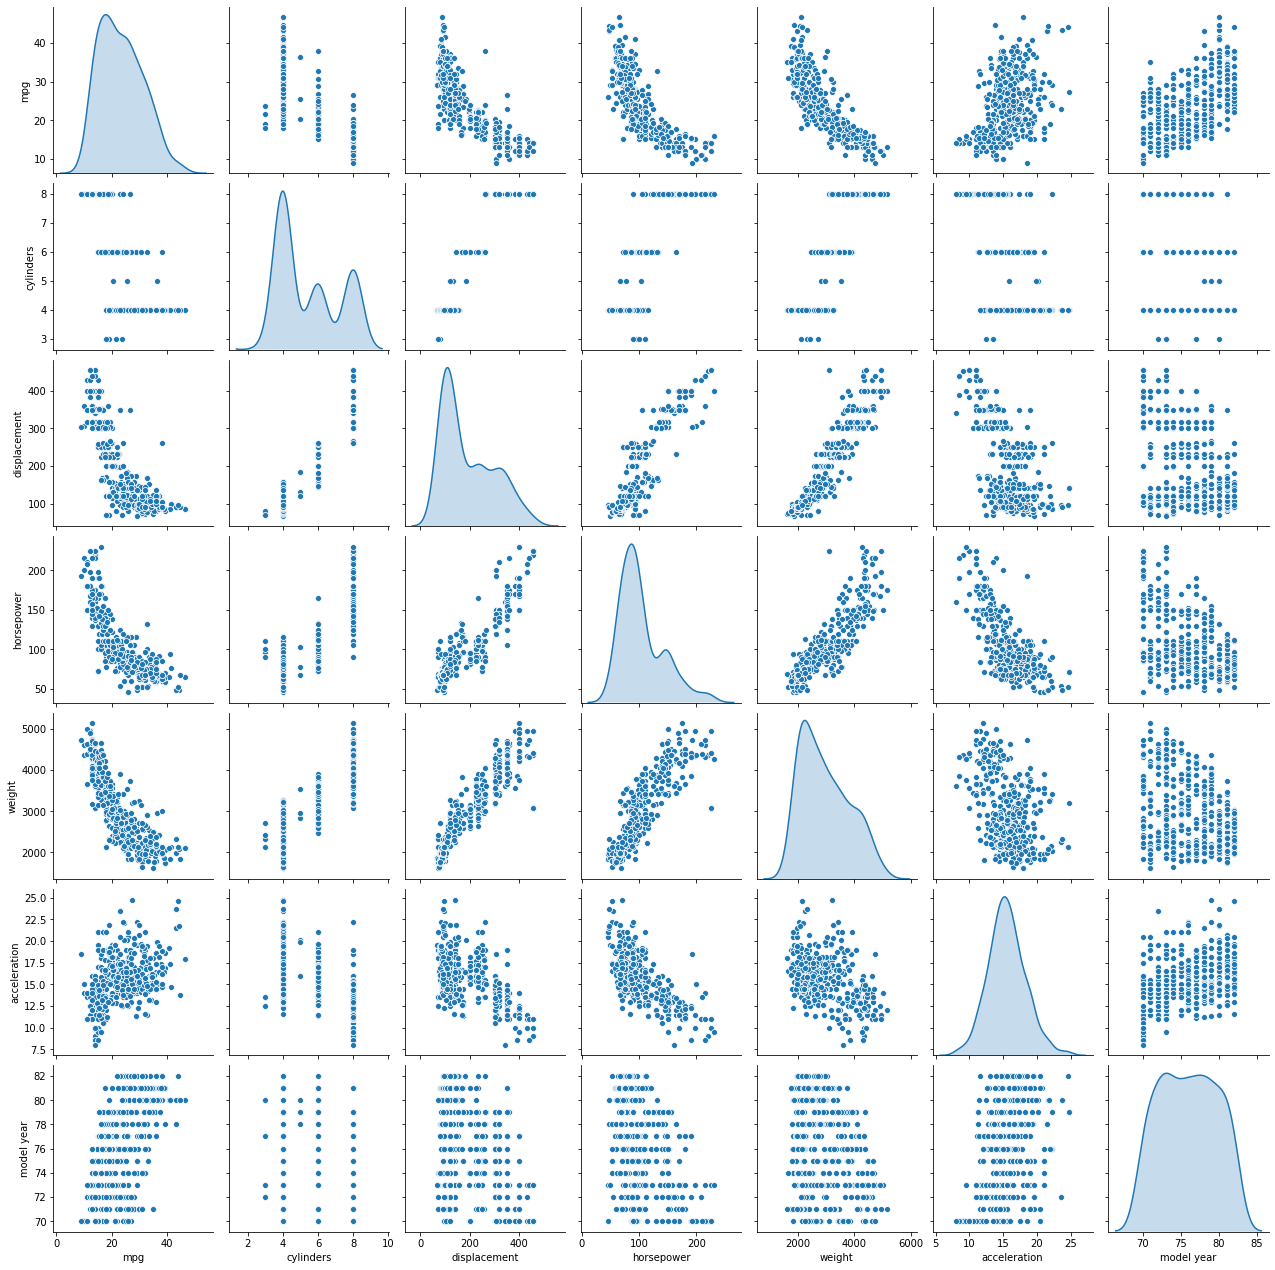

In [17]:
cData_attr = cData.iloc[:,0:7]
sns.pairplot(cData_attr, diag_kind = 'kde')  #To plot the density curve instead of histogram on diag

# Split Data

In [18]:
# Independent variables
x = cData.drop(['mpg','origin_Europe'], axis = 1)
# Dependent variable
y = cData[['mpg']]

In [19]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.30, random_state = 1)

# Fit Linear Model

In [26]:
regression_model = LinearRegression()
regression_model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here are the coefficient for the each variable and the intercept

In [27]:
for idx, col_name in enumerate(train_x.columns):
    print("The coefficient for {} is {} ".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {} ".format(intercept))

The coefficient for cylinders is -0.39480796616483443 
The coefficient for displacement is 0.028945510765487365 
The coefficient for horsepower is -0.021752207723546656 
The coefficient for weight is -0.007352032065147351 
The coefficient for acceleration is 0.0619193660076177 
The coefficient for model year is 0.8369338917645001 
The coefficient for origin_America is -3.0012830009185105 
The coefficient for origin_Asia is -0.6060179643247425 
The intercept for our model is -18.283451116372103 


## The score(R^2)

In [28]:
#score for in sample
regression_model.score(train_x, train_y)

0.814102550161056

In [29]:
#score for out of sample
regression_model.score(test_x,test_y)

0.8433135132808831

## mean squared error

In [30]:
pred_y = regression_model.predict(test_x)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mse = mean_squared_error(pred_y,test_y)
mse

9.16097967896155

# Adding intraction term

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [36]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)
train_x2 = poly.fit_transform(train_x)
test_x2 = poly.fit_transform(test_x)

In [38]:
poly_clf = linear_model.LinearRegression()
poly_clf.fit(train_x2,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## The score(R^2)

In [39]:
#Score for in sample
poly_clf.score(train_x2, train_y)

0.9015975294306535

In [40]:
#Score for out of sample
poly_clf.score(test_x2, test_y)

0.8647441053926571

In [41]:
#But this improve at the cost of 37 extra variables
print(train_x.shape)
print(train_x2.shape)

(278, 8)
(278, 37)


Polynomial features (with only intraction terms) have improved the out of sample R^2. However at the cost of increasing the number of variable significantly.